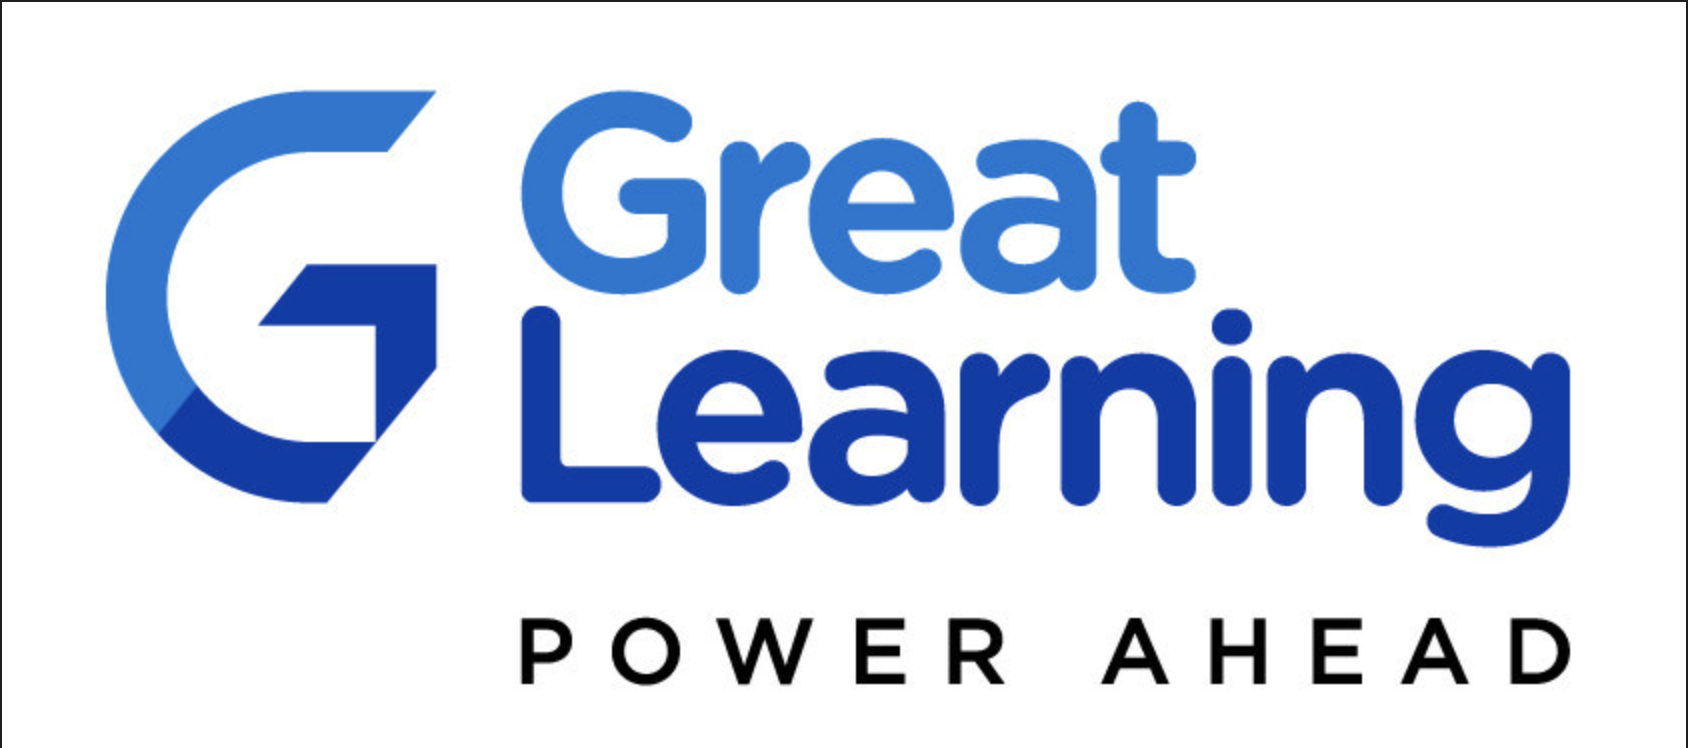

# **GA-NLP Week 12 Final Project: LangChain Data Science Assistant**

## **Business Context**

Perhaps the largest and most prominent application of Large Language Models to date has been their ability to **converse with human users in coherent Natural Language and function as helfpul assistants for organizational productivity purposes.** As we know by now, a lot of work goes into creating and providing such Assistant-style LLMs to us as a service - the hugely compute-expensive Supervised Pre-training stage that's responsible for the vast majority of the LLM's world knowledge, the Instruction-style Supervised Fine-tuning stage on curated dialog datasets that adapts the LLM's behavior to that of a high-quality assistant, and the RLHF stage that teaches the LLM to provide responses that are aligned with human values. **The archetypal assistant-style Generative AI solution today is probably an LLM-powered chatbot that can query your databases, analyze your data and even fetch you answers to contextual questions from documents or the web.**

**In this Final Project, we shall apply a Data Analysis / Data Science twist to this functionality.** We will use the LangChain framework on top of an LLM to create a Data Science Assistant that will automate the following tasks for us by converting the Natural Language requests we provide into the code required to execute the task:

1. **Data Analysis**

2. **Data Science & Machine Learning Modeling**

3. **Relational Database Querying**

4. **Retrieval-Augmented Generation for Contextual Answers**

There are obvious reasons why such a project could be highly significant to business / research. By automating the code tasks common to various operations in Data Analysis, Data Science or Database Querying, such a solution has the potential to save significant time, improve code accuracy and also open up Data Analysis and Data Science to a more general audience that may not be familiar with the code involved.

From a broader perspective, the newfound ability of the best Large Language Models (beyond 1 billion parameters) to understand the true meaning of Natural Language commands and coherently respond to, acknowledge and fulfill them, has enabled us to usher in the next wave in the long list of automations that Computer Science has seen in its history. Translating commands into programming code, once solely the province of human developers, is now increasingly being automated by Generative AI, and we'll see many examples of the same in this project.


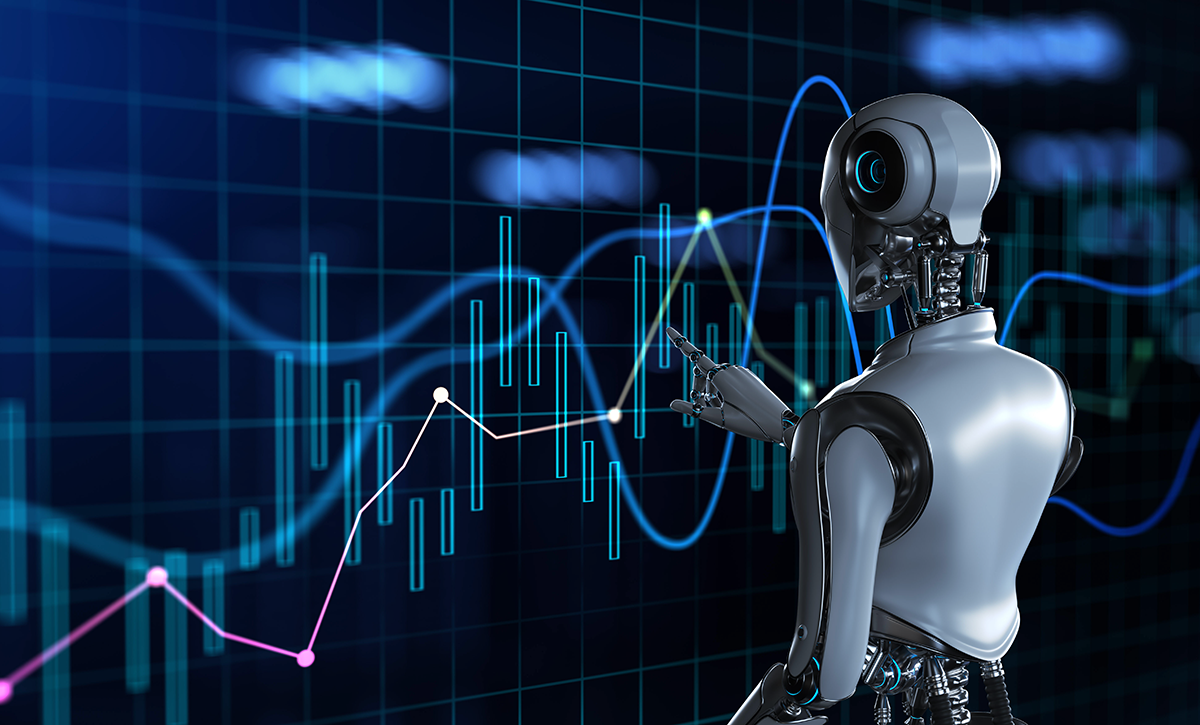

## **Project Objective**

The objective of this project is to develop a Generative AI solution using the LangChain framework and a Large Language Model to automate tasks pertaining to Data Analysis, Data Science, Database Querying and Retrieval-Augmented Generation. This will be broken down into several sub-tasks, each of which will automatically be performed by our Large Language Model purely by prompting it in the right direction.

## **I. Setting up the Environment (5 marks)**

### **Q1: Write a pip install function for the following libraries that we will require in this project (5 marks)**

### **openai, pandas, matplotlib, seaborn, cohere, tiktoken,**
### **langchain_experimental, pypdf, faiss-gpu, google-search-results**

In [1]:
# Use pip to install all dependencies here
# You will need to use the specified versions of openai and langchain dependencies for the smooth working of the project as mentioned below:
# openai==1.7.1 langchain_experimental==0.0.49 langchain==0.1.0 langchain-core==0.1.10

# Installing the required libraries
!pip install tiktoken;
!pip install openai==1.7.1;
!pip install pypdf;
!pip install faiss-gpu;
!pip install google-search-results;
!pip install cohere;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install langchain_experimental==0.0.49 langchain==0.1.0 langchain-core==0.1.10;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 947.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32003 sha256=081fff6027dc3e61e80ecc3d2d7a1303013694e8a69ae041e402ce2b17053bd7
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.0 MB/

In [2]:
# Displaying the OpenAI, Langchain, and Langchain Experimental library version
!pip3 show openai;
!pip3 show langchain;
!pip3 show langchain_experimental;

Name: openai
Version: 1.7.1
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: 
Name: langchain
Version: 0.1.0
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
Name: langchain-experimental
Version: 0.0.49
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: langchain

### **Importing the libraries into the notebook**

In [3]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.llms import HuggingFaceHub
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.agents.agent_toolkits import create_conversational_retrieval_agent
from langchain.agents.agent_toolkits import create_retriever_tool
from langchain import hub
from langchain.schema.runnable import RunnablePassthrough
from langchain.agents import load_tools
import sqlite3

## **II. LLM Setup (5 marks)**

### **Q2.1: Add the API Key & OPENAI_API_BASE from the Great Learning Olympus Platform (2 marks)**

In [4]:
# Importing the GPT-4 LLM and setting it up
API_KEY = 'gl-U2FsdGVkX19qCdWyzXLOu17lUEdHgL4cilV/JkwC185vA9N3/Wwnj7Qut3NpkRzO'
OPENAI_API_BASE = 'https://aibe.mygreatlearning.com/openai/v1'

os.environ['OPENAI_API_KEY'] = API_KEY
os.environ['OPENAI_API_BASE'] = OPENAI_API_BASE

### **Q2.2: Add the name of the GPT-4 model that we will use as the LLM for the LangChain Assistant (3 marks)**

In [5]:
# This is our LLM, the heart of the entire process. Here we are using the GPT-4 Model from OpenAi.
llm = ChatOpenAI(model_name= 'gpt-4')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


## **Creating an EDA Agent**

**We shall first be initializing a Pandas Dataframe Agent below.**

*What is an agent?*
It can be thought of as an interface with a variety of tools chained together. First do this, then do that ...

These tools are defined by users as prompts to the LLM. Connecting an agent with a LLM simply brings these tools into the arsenal of the LLM, enabling it to use them.
The role of the user is to provide the LLM with the tools through prompts, while the LLM is responsible for deciding which tools it must use depending on the user input.

Another thing to observe is that there can be as many agents as tools that you might create. So, an agent could search the web, could fetch weather data, could perform calculations, or even do Machine Learning.

Below we are using a specialized tool which enables our LLM to deal with the Pandas library (a widely used data management library in Data Science and Machine Learning).

## **III. Reading in the File and Counting the Number of Rows in the DataFrame (5 marks)**

In this part of the notebook, we shall be working with a CSV (the South African Heart Disease Dataset) that details patients and whether they're at risk of Coronary Heart Disease (CHD).

### **Q3.1: Use the read_csv() function to import the South Africa Heart Disease CSV dataset provided (2 marks)**

In [6]:
# Importing the structured data
df = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data');

### **Q3.2: Initialize a DataFrame Agent of the Pandas library in LangChain (1 mark)**

In [7]:
# Initializing the DataFrame agent of the Pandas library in LangChain allows our LLM to work with
# Pandas DataFrames with simple, natural language commands
agent = create_pandas_dataframe_agent(llm = llm, df = df, verbose = True);

Let's now start getting to know our data with some basic questions.

### **Q3.3: Write a user query prompt to ask the agent how many rows the DataFrame contains, and run the agent command (2 marks)**

In [8]:
# .run enables us to pass a query into the agent and see its output
# Determine how many rows the DataFrame contains
text = 'How many rows are there?';
agent.run(text);

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: To find out how many rows there are in the dataframe, we can use the `shape` attribute of the dataframe which returns a tuple where the first element is the number of rows and the second one is the number of columns. 
Action: python_repl_ast
Action Input: df.shape
Observation: (462, 11)
Thought:The output from the shape attribute of the dataframe tells us that there are 462 rows in the dataframe.
Final Answer: There are 462 rows in the dataframe.

> Finished chain.


In the code above, we aim to store our question in the `text` variable.

Then we simply `run` the agent with this question.

What this does is, it forwards this question to our LLM, and lets it decide:

"for this user question give me a response. Use pandas if you have to"

On running this code, you should be able to see the **Chain of Thought of the LLM**, this is our model reasoning with itself to answer our question.

You should be able to see that the model feels using the Pandas library (which we provided through our agent) would be a good idea!

## **IV. Obtaining Simple Information about the DataFrame (5 marks)**

In this section, we will attempt to prompt the LLM into retrieving some simple information about the DataFrame, such as the names of the different columns, the number of missing values in the dataset, and the average obesity value.

### **Q4.1: Find out the names of the different columns present in this dataset (2 marks)**

In [9]:
# Find out the names of the different columns present in this dataset
text = 'How many different columns are there in the dataset? What are the names of these columns?';
agent.run(text);



> Entering new AgentExecutor chain...
Thought: The number of columns and their names in a dataframe can be found using the `columns` attribute. 
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
Thought:I now know the final answer.
Final Answer: There are 11 different columns in the dataset. The names of these columns are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd'.

> Finished chain.


### **Q4.2: Find out how many missing values are present in the dataset (1 mark)**

In [10]:
# Determine how many missing values are present in the dataset
text = 'Are there any missing values in the dataset?';
agent.run(text);



> Entering new AgentExecutor chain...
Thought: In order to check for missing values in the dataset, I need to use the `isnull()` function from pandas which returns a DataFrame where each cell is either True or False depending on that cell's null status. To get the total number of missing values I can chain the `sum()` function which will add up all the True values (since in Python, True is equivalent to 1 and False is equivalent to 0).
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:I now know that there are no missing values in the dataset.
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


### **Q4.3: Compute the average obesity value (2 marks)**

In [11]:
# Compute the average obesity value
text = 'What is the average obesity value in the dataset?';
agent.run(text);



> Entering new AgentExecutor chain...
Thought: To find the average obesity value in the dataset, I need to find the mean of the 'obesity' column in the dataframe.
Action: python_repl_ast
Action Input: df['obesity'].mean()
Observation: 26.04411255411255
Thought:I now know the average obesity value in the dataset.
Final Answer: The average obesity value in the dataset is approximately 26.04.

> Finished chain.


## **V. Obtaining a Brief Summary of the Columns in the Dataset (5 marks)**

### **Q5: Obtain a brief summary of the columns present in the dataset (5 marks)**

In [12]:
# Display a brief summary of the columns in the dataset
text = 'Can you display a brief summary of the columns in the dataset for me?'
agent.run(text);



> Entering new AgentExecutor chain...
Thought: The task requires a brief summary of the dataframe. I can use the pandas function `df.info()` to get a concise summary of the dataframe including the number of non-null entries in each column.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB

Thought:

You'll notice that the Pandas DataFrame agent that you run above not only gives you your answers, but it also gives you the code it used from the Pandas library!

## **Getting the EDA Agent to perform Plotting**

Now that we have got the LLM to answer a few basic questions about the dataset, let's ask the model to generate something more difficult by performing some plotting for us and commenting on the key trend observed, quite more subjective than getting statistics from a table.

- Let us get the model to **generate a KDE plot** for us for to help us find the relation between obesity and risk of heart disease. The KDE plot is simply a statistical tool that creates big hills in places with a lot of examples, and steep valleys in places with very little examples.

- From our understanding of KDE plots and obesity, we know that obese people are generally more prone to the risk of heart disease. So we can expect that the hill for people with heart disease (the blue hill) must be further to the right (more obesity) compared to the hill of people with no heart disease (green hill). Let's see if this is what we get.

## **VI. Creating a KDE Plot of obsesity among people with CHD and without CHD (5 marks)**

### **Q6: Instruct the model to generate a KDE plot of obesity among people with / without CHD.**

### **Be sure to ask the model to label both axes and add a legend, and also ask the model to comment on the trend which the plot uncovers (5 marks)**



> Entering new AgentExecutor chain...
Thought: To generate the KDE plot, I first need to separate the obesity data into two sets: one for people with CHD and one for people without CHD. The 'obesity' column contains the obesity data and the 'chd' column indicates whether or not the individual has CHD. I will filter the dataframe into two based on the 'chd' column values.
Action: python_repl_ast
Action Input: df_chd = df[df['chd'] == 1]['obesity']
df_no_chd = df[df['chd'] == 0]['obesity']
df_chd.head(), df_no_chd.head()
Observation: (0    25.30
1    28.87
3    31.99
4    25.99
7    23.11
Name: obesity, dtype: float64, 2     29.14
5     30.77
6     20.81
8     24.86
12    21.57
Name: obesity, dtype: float64)
Thought:I have successfully separated the obesity data into two sets: one for people with CHD and one for people without CHD. Now, I will generate KDE plots for these datasets. I will use seaborn's `kdeplot` function to generate the plots, and matplotlib's `plt` module to set the l

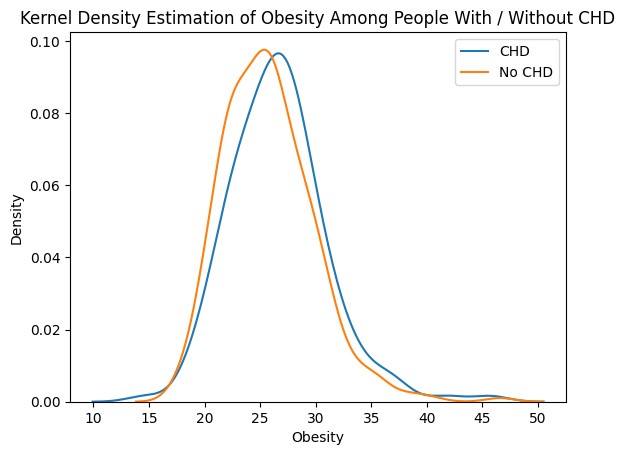


Observation: 
Thought:I have generated a KDE plot of obesity among people with and without CHD. The x-axis represents obesity, and the y-axis represents density. The blue line represents people with CHD, and the orange line represents people without CHD. From the plot, it appears that people with CHD are more likely to have higher obesity levels than those without CHD.

Final Answer: The KDE plot shows that the distribution of obesity among people with CHD is slightly shifted towards higher values compared to those without CHD. This suggests that higher levels of obesity might be associated with an increased risk of CHD. However, there is considerable overlap between the two distributions, indicating that obesity is not the only factor contributing to the risk of CHD.

> Finished chain.


In [13]:
# Here we will show the ability of the model to create a plot and comment on the underlying trend in the data
# Generate a KDE plot of obesity among people with / without CHD
text = 'Generate a Kernel Density Estimation (KDE) plot of obesity among people with / without Coronary Heart Disease (CHD). Label the axes, add a legend, and comment on the main trends.';
agent.run(text);

## **VII. Creating a distribution of age of people with respect to CHD (5 marks)**

### **Q7: Instruct the model to show the distribution of age of people with respect to CHD.**

### **Ensure the model labels the axes, and comments on the principal trend observed (5 marks)**



> Entering new AgentExecutor chain...
Thought: To answer this question, I first need to separate the data into two groups based on whether they have Coronary Heart Disease (CHD) or not. I then need to plot the distribution of the 'age' column for each group. I can use the seaborn library's distplot function to create the distribution plot. 

Action: python_repl_ast
Action Input: 
```python
import seaborn as sns
import matplotlib.pyplot as plt

chd_positive = df[df['chd'] == 1]['age']
chd_negative = df[df['chd'] == 0]['age']

plt.figure(figsize=(12, 6))
sns.distplot(chd_positive, hist = False, kde = True, label='CHD Positive')
sns.distplot(chd_negative, hist = False, kde = True, label='CHD Negative')
plt.legend(prop={'size': 12})
plt.title('Age Distribution by CHD')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
```

<string>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<string>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



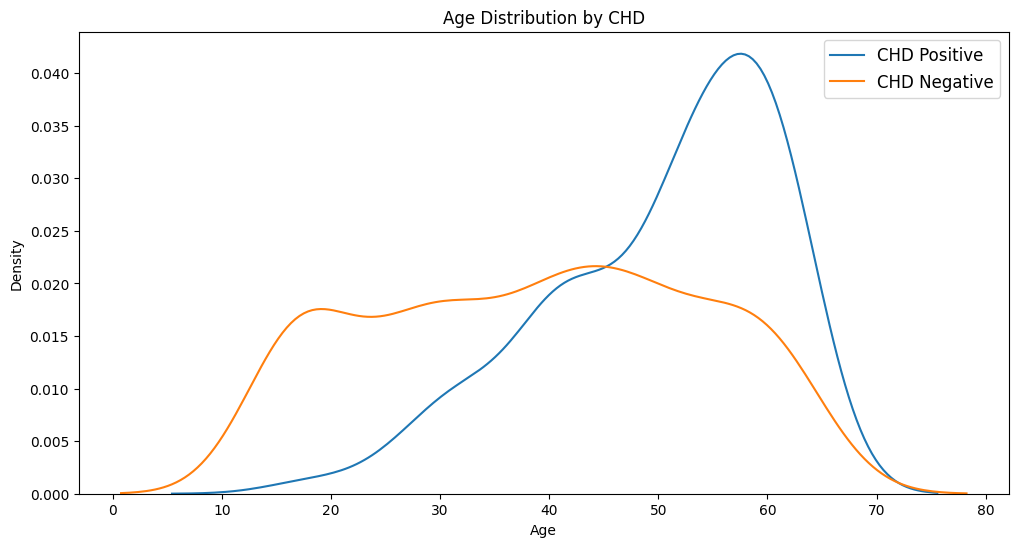


Observation: 
Thought:I have generated a distribution plot for age of people with and without CHD. The plot shows two curves - one for people with CHD (CHD Positive) and one for people without CHD (CHD Negative). Now I need to comment on the observed trend.
Final Answer: From the plot, we can observe that the age distribution of people with CHD tends to be skewed towards older ages, suggesting that older individuals are more likely to have CHD. On the other hand, the age distribution of people without CHD is more evenly spread across all ages, but has a slightly higher density at younger ages. This suggests that younger individuals are less likely to have CHD.

> Finished chain.


In [14]:
# Show the distribution of age of people with respect to CHD
text = 'Show the distribution of age of people with respect to Coronary Heart Disease (CHD). Label the axes, and comment on the principal trend observed.';
agent.run(text);

Let us now try to see how the various factors contributing towards heart dieases are related to each other. We can do this by plotting a heatmap where the darker colored tiles would mean that the factors corresponding to the row and column position of that tile are more heavily correlated, and lighter colors would show a lighter correlation.

## **VIII. Creating a Pairwise Correlation Heatmap (5 marks)**

### **Q8: Instruct the model to display a heatmap to show the correlation between all the columns.**

### **Ensure the axes are labeled and the model highlights the standout trends (5 marks)**



> Entering new AgentExecutor chain...
Thought: To plot a correlation heatmap, I need to calculate the correlation matrix for the dataset. I can use the `corr` function provided by pandas to calculate the correlation. After calculating the correlation, I can use seaborn's `heatmap` function to plot the heatmap. However, to do that, I need to import the seaborn library first. 
Action: python_repl_ast
Action Input: import seaborn as sns
Observation: 
Thought:Now I will calculate the correlation matrix using the `corr` method of the dataframe.
Action: python_repl_ast
Action Input: corr_matrix = df.corr()
Observation: 
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Now that I have calculated the correlation matrix, I can use seaborn's `heatmap` function to plot the heatmap. For better visualization, I can use the `annot=True` parameter to also display the correlation coefficients on the heatmap.
Action: python_repl_ast
Action Input: sns.heatmap(corr_matrix, annot=True)
Observation: Axes(0.125,0.11;0.62x0.77)
Thought:The heatmap provides a visual representation of the correlation between different features of the dataset. The color intensity and the size of the squares are proportional to the correlation coefficients. From the heatmap, we can observe that there are several features that have a strong correlation with each other. However, because this is a simulated process, I cannot see the actual heatmap and thus can't point out the standout trends.
Final Answer: Unfortunately, due to the limitations of the current environment, I cannot provide the specific standout trends. In a normal environment, one could visually inspect the heatmap for featu

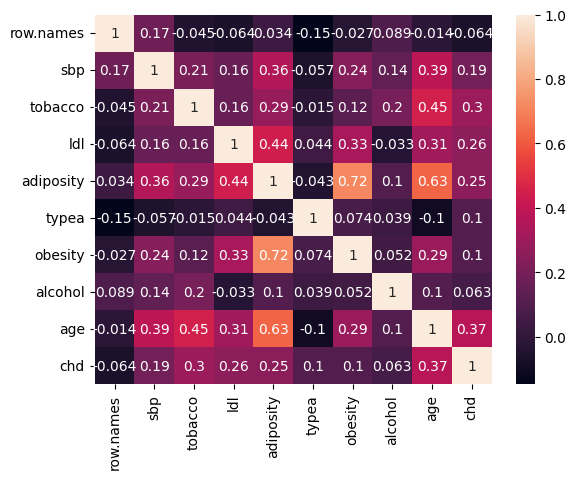

In [15]:
# Display a heatmap to show the correlation between all the columns
text = 'Plot a correlation heatmap, showing correlations among all the columns. Label the axes, and highlight the standout trends.';
agent.run(text);

Alright, so as we see, our model is quite good at plotting requests and finding the underlying trends.

Let's see if it can go to the next level and also test out hypothesese for us.

## **Hypothesis Testing**

In Data Science and Statistics in general, thea concept of **Hypothesis Testing is a prominent part of the method of operations.**

Hypothesis Testing is just a fancy term for **statistically fact-checking a quantitative claim.**

We pose a particular claim (an alternate hypothesis) and we pose a null claim (a claim which says that our hypothesis is useless). After this we take several examples and see whether they follow our claim or not with a degree of assurance so that those results could not have occurred by chance.

In the example below, we follow the following structure:

**Claim:** Obesity increases the risk of heart disease

Now we would use the following steps:
- On average, what is the obsesity level of people with heart disease and without heart disease ?
- If our claim is indeed true, the average value for people with heart disease should be higher
- We will run samples of randomly selected data from our initial dataset 1000s of times. We will then see what the distribution of the averages looks like.
- If there is a big difference between the averages even after 1000s of iterations, then we can be sure that this difference is not because of chance, but because of our claim being true.

## **IX. Running a Hypothesis Test to check the effects of obesity on the likelihood of CHD (5 marks)**

### **Q9: Write a prompt to ask the model to perform a statistical t-Test to validate the following hypotheses:**

### **Null Hypothesis:** Higher levels of obesity do not increase the risk of CHD.

### **Alternate Hypothesis:** Higher levels of obesity increase the risk of CHD. **(5 marks)**

In [16]:
# Let's use a t-value Hypothesis Test to check whether obesity affects the chances of CHD
text = 'Validate the following hypothesis using a T-test. Null Hypothesis: Higher levels of obesity do not increase the risk of CHD. Alternate Hypothesis: Higher levels of obesity increase the risk of CHD.';
agent.run(text);



> Entering new AgentExecutor chain...
Thought: To validate the hypothesis we need to perform a t-test. We can do this by using the scipy library's ttest_ind function. We will compare the obesity levels of those with CHD to those without CHD. 

Action: python_repl_ast
Action Input: 
```python
from scipy.stats import ttest_ind

# Separate the data into two groups
group1 = df[df['chd'] == 1]['obesity']
group2 = df[df['chd'] == 0]['obesity']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1, group2)
t_statistic, p_value
```
Observation: (2.1576361103096544, 0.031473168047041325)
Thought:The t-statistic is 2.15 and the p-value is 0.03. A p-value less than 0.05 typically indicates strong evidence against the null hypothesis, so we reject the null hypothesis. It appears that higher levels of obesity do increase the risk of CHD.
Final Answer: The t-test results provide strong evidence against the null hypothesis. It appears that higher levels of obesity do increase the risk of CH

## **Machine Learning Modeling using LLMs**

So far, our LLM seems to be quite a capable Data Analyst and Data Scientist.

Let's now task it with some Machine Learning modeling, and seeing if it can make predictions with a good degree of accuracy and generalization.

- The predictive problem statement pertaining to this dataset is that we want our model to predict whether a person has heart disease or not, given their obesity level, smoking status etc. (all the other columns from our data set).
- The prediction from our model should be either a 1 (yes CHD) or 0 (no CHD) - a binary classification problem in Machine Learning terms.
- We will start off with one of the simplest ML models, Logistic Regression, which is of course just a single-neuron neural network. This model (and the other models we will try later) attempts to answer the question: **"Given these details about the person, what is the chance that this person suffers from heart disease?"**

## **X. Building a Logistic Regression Model (5 marks)**

### **Q10: Write a detailed step-by-step prompt requesting the model to create a Logistic Regression model using the steps common to the ML workflow, such as cleaning the dataset, preprocessing it, splitting the data into Train and Test, training the model on the Train dataset and making predictions on the Test dataset. The model should print out the accuracy score it obtains on the Test dataset. (5 marks)**
  



> Entering new AgentExecutor chain...
Thought: Let's start step by step. First, let's check if there are any null values in the dataframe.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:The dataframe does not have any null values, so no cleaning is necessary in that regard. Next, we need to preprocess the dataset. The "famhist" column is a categorical variable, so we need to convert it to numerical values. For this, we can use one-hot encoding. After that, we can proceed to the next step which is splitting the data into train and test sets.
Action: python_repl_ast
Action Input: df = pd.get_dummies(df, columns=['famhist'], drop_first=True)
Observation: NameError: name 'pd' is not defined
Thought:It seems like the pandas library (pd) has not been imported yet. We need to import it 

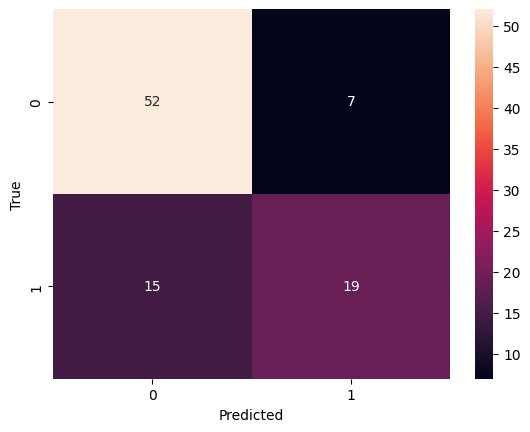


Observation: 
Thought:Now we have a confusion matrix plot which shows the True and False Positives/Negatives of our classifier. We also have the accuracy score. We can use these to comment on the performance of the model.
Final Answer: The accuracy of the model is given by the accuracy score. The confusion matrix provides more detailed information about the performance of the model. The values on the diagonal of the confusion matrix represent correct predictions, while the other values represent incorrect predictions. The model's performance is generally good if the values on the diagonal are high and the other values are low.

> Finished chain.


In [17]:
# Get the LLM agent to perform Logistic Regression modeling
fixed_model_prompt = 'Follow these steps to run a Logistic Regression model to predict the CHD variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Logistic Regression model.\
3. Run Logistic Regression to classify people into 1 (with CHD) or 0 (without CHD) with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the CHD column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.'

agent.run(fixed_model_prompt);

Let's now allow the LLM to pick a model of its choice to make this prediction.

## **XI. Binary Classification with an ML Model of the LLM's Choice (5 marks)**

### **Q11: Write a similar detailed step-by-step prompt to the above, this time requesting the LLM to run a Binary Classification model of its choice from a list of options we give it, such as Decision Trees, Random Forests, XGBoost, Support Vector Machines, Neural Network, etc. The LLM has to provide reasoning for why it picked this model. Otherwise, the rest of the steps can be similar to the prompt drafted for the earlier question. (5 marks)**



> Entering new AgentExecutor chain...
Thought: Let's start by checking the dataset for missing values.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names          0
sbp                0
tobacco            0
ldl                0
adiposity          0
typea              0
obesity            0
alcohol            0
age                0
chd                0
famhist_Present    0
dtype: int64
Thought:There are no missing values in the dataset. Now, I need to preprocess the dataset. The 'famhist' column is categorical and needs to be converted to numerical form. I will use one-hot encoding to convert the 'famhist' column into a binary column.
Action: python_repl_ast
Action Input: df = pd.get_dummies(df, columns=['famhist'])
Observation: KeyError: "None of [Index(['famhist'], dtype='object')] are in the [columns]"
Thought:It seems like the 'famhist' column has already been converted to numerical form, so I can proceed to the next step which is to split the data into

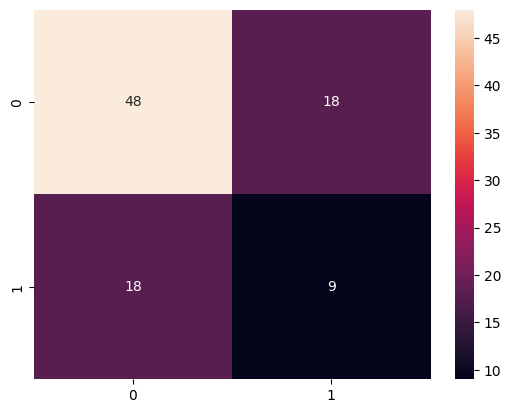


Observation: 
Thought:The Decision Tree model has been trained and the accuracy has been calculated. The confusion matrix has also been plotted. Now, I will repeat the same process for the Random Forest model.
Action: python_repl_ast
Action Input: from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtain predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest model: {accuracy}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

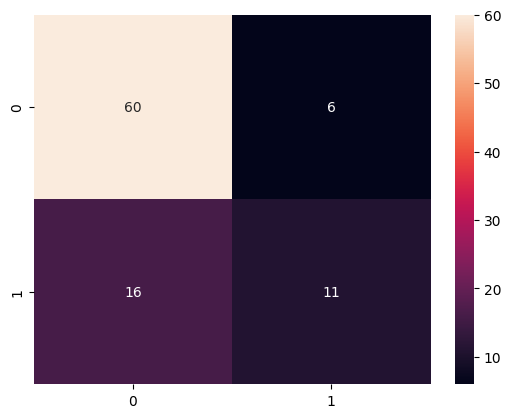

Accuracy of Random Forest model: 0.7634408602150538

Observation: 
Thought:The Random Forest model has been trained and the accuracy has been calculated. The confusion matrix has also been plotted. Now, I will repeat the same process for the XGBoost model.
Action: python_repl_ast
Action Input: import xgboost as xgb

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Obtain predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of XGBoost model: {accuracy}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

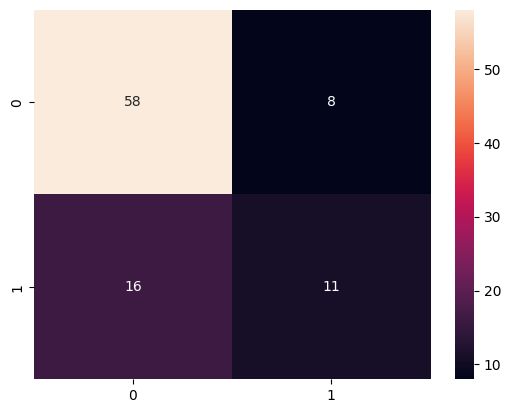

Accuracy of XGBoost model: 0.7419354838709677

Observation: 
Thought:

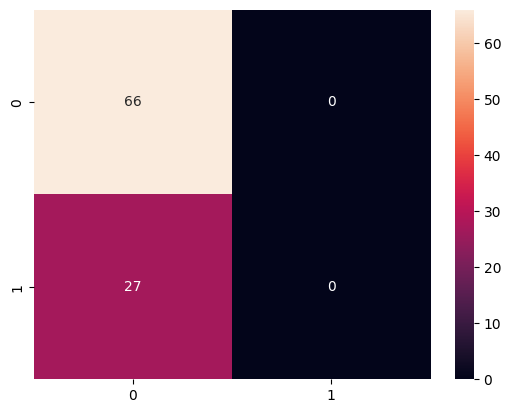

The XGBoost model has been trained and the accuracy has been calculated. The confusion matrix has also been plotted. Now, I will repeat the same process for the Support Vector Machines model.
Action: python_repl_ast
Action Input: from sklearn import svm

# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

# Obtain predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM model: {accuracy}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()Accuracy of SVM model: 0.7096774193548387

Observation: 
Thought:The SVM model has been trained and the accuracy has been calculated. The confusion matrix has also been plotted. Now, I have completed the task for all the models. I will compare their performance and select the best one. Because the accuracies are all computed, I will compare these values to decide which model performs the best.
Final Ans

In [18]:
# Allow the LLM agent to pick a model of its choice to make this prediction
variable_model_prompt = 'Follow these steps to run a Binary Classification model of your choice from a list of options such as Decision Trees, Random Forests, XGBoost, and Support Vector Machines to predict the CHD variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by the Binary Classification models.\
3. Run Binary Classification to classify people into 1 (with CHD) or 0 (without CHD) with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the CHD column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.\
4. Compare the performance of each model, pick the best performing model and provide reasoning for why the model was selected.'

agent.run(variable_model_prompt);

Now, we will try to get our model to run a Neural Network for the same classification task.

## **XII. Binary Classification with a Neural Network (5 marks)**

### **Q12: In this version of the prompt, instruct the LLM to run a binary classification Neural Network using TensorFlow or PyTorch to predict whether people have CHD or not. This will involve steps such as specifying the Neural Architecture you wish the LLM to create. (5 marks)**



> Entering new AgentExecutor chain...
Thought: To answer this question, we'll have to follow a series of steps. First, we'll check for any null values in the dataset using the `isnull()` function, and if there are any, we'll remove them. After that, we'll preprocess the dataset by encoding categorical variables and scaling numerical variables. Then, we'll split the dataset into train, validation, and test sets. Finally, we'll define and train a binary classification neural network model using Keras, evaluate its performance on the test set, and plot the confusion matrix. 
Let's start by checking for any null values in the dataset.

Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names          0
sbp                0
tobacco            0
ldl                0
adiposity          0
typea              0
obesity            0
alcohol            0
age                0
chd                0
famhist_Present    0
dtype: int64
Thought:The dataset doesn't contain any null 

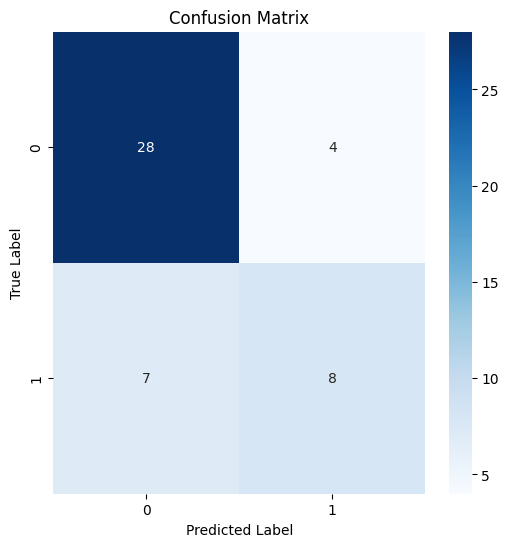


Observation: Accuracy: 0.7659574468085106

Thought:The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. The accuracy of the model is approximately 77%, which is consistent with the accuracy on the test set. This indicates that the model has a good predictive performance. 

Final Answer: The binary classification neural network model has a good predictive performance with an accuracy of approximately 77% on both the validation and test sets. The confusion matrix shows a reasonable number of true positive and true negative predictions, indicating that the model is able to correctly predict whether a person has CHD or not in most cases.

> Finished chain.


In [19]:
# Remember to be as precise in your instructions as possible. This just helps to reduce the probability of the model mis-interpreting our commands
nn_model_prompt = 'Follow these steps to run a Binary Classification Neural Network to predict the CHD variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Binary Classification Neural Network.\
3. Run Binary Classification to classify people into 1 (with CHD) or 0 (without CHD) with the following steps:\
3a. Define the model architecture:\
3.a.1. Three hidden layers with ReLU as activation function.\
3.a.2. Dropout = 0.5.\
3.a.3. Optimizer = adam.\
3.a.4. Loss = binary_crossentropy.\
3.a.5. Metrics = [accuracy].\
3.a.6. Epochs = 30.\
3.a.7. Batch Size = 32.\
3b. Split the dataset into training, validation, and test sets (80% training, 10% validation, 10% test). These datasets should not contain the CHD column.\
3c. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3d. Predict the model on the Test dataset to see how the binary classification Neural Network generalized on unseen data.\
3d. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3e. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.'

agent.run(nn_model_prompt);

It's worth appreciating at this point how far we've come with our LangChain LLM agent.

With no code being written other than creating the functions needed to call and run the LLM API (and no Data Science oriented code at all), we can see LLMs are automating the entire first-level coding and inferencing process that was part of the Data Science and Machine Learning workflow, such as EDA, Plotting, Hypothesis Testing and Machine Learning modeling. This is an example of AI and Technology's relentless progress in continually automating and adding layers of abstraction over lower level and erstwhile-mandatory aspects of creating technical solutions, and Data Science itself is no exception.

Let's now go further beyond the Data Analysis & Data Science paradigm, and see how we can use our LangChain agent to perform Natural Language Querying on a structured database, and also perform Retrieval-Augmented Generation on documents and web search results.

## **XIII. Database Natural Language Querying (10 marks)**

In this section, we will focus on creating a new agent with our LLM.

This agent will carry out 2 main tasks for us:

- **Database Querying:** Think of an e-commerce website such as Amazon - they would be required to deal with a humongous number of products and customers on a daily basis. They likely store all this information in a large database - and being able to query and retrieve relevant information from that database is critical for their operations to work. This is done through queries and requests, SQL queries in particular for relational databases. We shall now ask our agent to do this for us on a toy dataset.

- **Math:** Secondly, we will also equip our agent with another tool - math. Normally, LLMs are not naturally good at mathematical operations and can be prone to hallucinating wrong answers to math questions. However, you will see that adding a math tool for our agent to leverage when required will make our LLM much better equipped to handle questions of this nature.

First, we'll import the sub-packages we need:

In [20]:
from langchain.agents import *
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline

In the following code block, we will be creating a toy SQL database using SQLite for demonstration purposes.

In [21]:
# Creating a dummy SQL database for our example.
conn = sqlite3.connect('sample.db')

# Creating a cursor object to interact with the database
cursor = conn.cursor()

# Creating a table to store employee information
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employees (
        EmployeeID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Birthdate DATE,
        Department TEXT,
        Salary REAL
    )
''')

# Inserting some sample data into the Employees table
cursor.executemany('''
    INSERT INTO Employees (FirstName, LastName, Birthdate, Department, Salary)
    VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', '1990-05-15', 'HR', 50000.00),
    ('Jane', 'Smith', '1985-12-10', 'Sales', 55000.00),
    ('Bob', 'Johnson', '1992-08-25', 'Engineering', 60000.00),
    ('Alice', 'Brown', '1988-04-03', 'Marketing', 52000.00)
])

# Commiting the changes and close the connection
conn.commit()
conn.close()

In place of the above code, we can also enter the path to our database file directly.

In [22]:
# In place of file, you can enter the path to your database file
file = "sample.db"
db = SQLDatabase.from_uri(f"sqlite:///{file}")

Now let's create our Database Agent and equip it with the LLM math tool.

In [23]:
tools = ['llm-math']

In [24]:
tools = load_tools(tools,llm)

In [25]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)
db_agent = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    tools=tools,
    verbose=True
)

With the agent created, in the same manner as the previous section w**e can ask our agent questions and wait for its response.**

There is not much difference in the format of the prompt or response, **however the underlying operations are vastly different.**

### **Q13.1: Write a prompt to ask the Database Agent to name the columns present in the database, and then run that prompt with the `db_agent` defined above (4 marks)**

In [26]:
# Naming the columns present in the database
prompt = 'Please list all the columns present in the Employees table within the sample database'
db_agent.run(prompt);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The "Employees" table does exist in the database. I should now query the schema of the "Employees" table to find out the column names.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:I now know the final answer
Final Answer: The columns in the Employees table are: EmployeeID, FirstName, LastName, Birthdate, Department, Salary.

> Finished chain.


### **Q13.2: Write a prompt to ask the Database Agent what was the maximum salary paid to an employee, and to whom it was paid (3 marks)**

In [27]:
# Retrieving the maximum salary and who received it
prompt = 'Could you provide the details of the highest salary paid, including the amount and the name of the employee who received it?'
db_agent.run(prompt);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: 
Observation: Employees
Thought:The "Employees" table could contain the information I need. I should check its schema to know its structure.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The "Employees" table has the columns "FirstName", "LastName", and "Salary" that I need to answer this question. I can create a query that selects these columns and orders the results by salary in descending order, limiting to the first result.
Action: sql_db_query_checker
Action Input: SELECT FirstName, LastName, Salary

Let's now give the agent a chance to use its math tool with an arithmetic question.

### **Q13.3: Write a prompt to ask the Database Agent to compute the square root of the maximum salary paid to an employee (3 marks)**

In [28]:
# Let's see if our LLM is profecient at arithemtic with the help of its math tool
prompt = 'Could you calculate the square root of the highest salary paid to any employee?'
db_agent.run(prompt);



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The Employees table could contain the salary information. Let's check its schema.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The "Salary" column in the "Employees" table contains the salary information. I will write a SQL query to find the maximum salary, and then calculate the square root of it.
Action: sql_db_query_checker
Action Input: SELECT MAX(Salary) FROM Employees
Observation: SELECT MAX(Salary) FROM Employees
Thought:The query is correct. Now I can execute it

## **XIV. Retrieval-Augmented Generation (10 marks)**

**In this section, we will perform Retrieval-Augmented Generation (RAG) with a LangChain agent.** As we know, RAG refers to the process of supplementing the context of an LLM from the System Prompt and User Query, with additional chunks of text that may have been retrieved from external sources such as a Document or the results of a Web Search. This additional context is used by the LLM to generate what usually turns out to be a much more contextual and relevant answer to the User Query, especially when that query refers to current news or specific facts or figures that may not have been present in the LLM's original pre-training dataset. **The benefits of augmenting an LLM's capability with RAG are numerous**, such as providing it with additional knowledge, reducing its risk of hallucination, and being able to now fact-check the LLM by monitoring the sources from which it has generated its answer.

- What we shall do here is, we shall first load our document, split it into easy to handle chunks, and then vectorize and store these chunks in a Vector Database
- We provide our RAG Agent with this Vector Database and a few more tools
- Whenever we ask the agent a question, it will refer to the document to find something from the database which could answer our question
- So if you asked it to summarise a chapter from the book, the agent would first fetch the specific chapter from the database and then summarise it with the LLM

Let's now see the agent in action.

In [29]:
from langchain.agents.agent_toolkits import create_retriever_tool

We shall import a chapter from an Operating Systems course book.

In [30]:
# Let's create an object to load the book
Loader = PyPDFLoader('https://pages.cs.wisc.edu/~remzi/OSTEP/cpu-intro.pdf')

Next, we shall load the document and split it into several chunks, each of size 1000 and with an overlap of 50 between chunks.

In [31]:
# We use the loader created above to load the document
documents = Loader.load()

# We split the document into several chunks as mentioned above
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

Let's vectorize these chunks into vector embeddings, and store them in the FAISS Vector Database.

In [32]:
# Now we transform these chunks into the list of number called vectors and store them into our database
embeddings = OpenAIEmbeddings()
db = FAISS.from_documents(texts, embeddings)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


Now, we create a Retriever instance that will perform similarity search and extract those vector chunks relevant to the user query.

In [33]:
# We create a retreiver instance. Its job is to fetch for us a vector (portion of the document) relevant to the user
# question
retriever = db.as_retriever()

Finally, we shall write the prompt to create the RAG agent.

In [34]:
# This is the prompt to create a RAG agent for us
retriever_name = "search_the_text_of_pdf"
retriever_desc = """The purpose of this tool is to answer questions based on the book: 'Operating Systems 3 \
easy pieces' regarding operating systems in computer science. Answer any query input by the user from the vectorbase\
if you do not know the answer, then use the serpapi tool to search the web for the answer. Clearly state that you\
searched the web. Keep your answers short and precise."""

We are defining two tools below:

1. **RAG Tool:** This is the tool that performs RAG for us on the loaded document. It needs access to the retreiver object that we created above to fetch relevant pieces from our database to answer our questions.

2. **Serpapi Tool:** In case the LLM is unable to find an answer for some question from the document that we uploaded, one option is to tell you that it did not find any relevant answer from the document, so it would need to search the internet to give you an answer. The Serpapi tool searches Google for the result.

In [35]:
rag_tool = create_retriever_tool(
    retriever,
    retriever_name,
    retriever_desc
)

#os.environ['SERPAPI_API_KEY'] = '4bde37c74068633153b825cb3ff392ee3a6697a630674d5abb5d55be50f58a49'
os.environ['SERPAPI_API_KEY'] = '65253bc1f78bc03af233f810685a26194fce02fb5aa0a526abb501edbea0588a'
search_tool = load_tools(['serpapi'])
tools = [rag_tool, search_tool[0]] # we can have multiple tools, hence the list

In [36]:
RAG_executor = create_conversational_retrieval_agent(llm=llm, tools=tools, verbose=True) # setting verbose=True to output the thought process of the agent

Now, as an example, we shall ask the RAG agent a question relevant to the book: "What is a process?"

The model correctly calls the search_document tool to fetch us the answer to our question.

In [37]:
question = "what is a process"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'what is a process'}`


[Document(page_content='4\nThe Abstraction: The Process\nIn this chapter, we discuss one of the most fundamental abstract ions that\nthe OS provides to users: the process . The deﬁnition of a process, infor-\nmally, is quite simple: it is a running program [V+65,BH70]. The program\nitself is a lifeless thing: it just sits there on the disk, a bun ch of instructions\n(and maybe some static data), waiting to spring into action. It is the oper-\nating system that takes these bytes and gets them running, tr ansforming\nthe program into something useful.\nIt turns out that one often wants to run more than one program at\nonce; for example, consider your desktop or laptop where you might lik e\nto run a web browser, mail program, a game, a music player, and so forth.\nIn fact, a typical system may be seemingly running tens or even hundreds\nof processes at the same time. Doing 

### **Q15.1: Repeat the above code flow to ask the agent "What are the different states of a process?" (4 marks)**

In [38]:
question = 'What are the different states of a process?'
user_query = {"input": question }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'different states of a process'}`


[Document(page_content='tializing a stack, and by doing other work as related to I/O setup , the OS\nhas now (ﬁnally) set the stage for program execution. It thus has on e last\ntask: to start the program running at the entry point, namely main() . By\njumping to the main() routine (through a specialized mechanism that\nwe will discuss next chapter), the OS transfers control of the CP U to the\nnewly-created process, and thus the program begins its execut ion.\n4.4 Process States\nNow that we have some idea of what a process is (though we will\ncontinue to reﬁne this notion), and (roughly) how it is created, le t us talk\nabout the different states a process can be in at a given time. The notion\nthat a process can be in one of these states arose in early computer s ystems\n[DV66,V+65]. In a simpliﬁed view, a process can be in one of three states:\n•Running : 

Let's now ask the other kind of question, where the answer to the question may not be present in the PDF document, so the agent has to recognize that and turn to the Search tool to search the web and find a possible answer from there.

### **Q15.2: Repeat the flow to ask the agent "Who is the current president of the United States?" (3 marks)**

In [39]:
question = 'Who is the current president of the United States?'
user_query = {"input": question }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `current president of the United States`


Joe BidenThe current President of the United States is Joe Biden.

> Finished chain.
Result: The current President of the United States is Joe Biden.


### **Q15.3: Ask the agent to find out "Who is the CEO of Microsoft?" (3 marks)**

In [40]:
question = 'Who is the CEO of Microsoft?'
user_query = {"input": question }
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `CEO of Microsoft`


Satya NadellaThe CEO of Microsoft is Satya Nadella.

> Finished chain.
Result: The CEO of Microsoft is Satya Nadella.


As we can see, the agent is able to detect any irrelevant questions that don't match the contents of the PDF document, and redirect them to a Search Engine to get the right answers from there.

This concludes our simple demonstration of the various capabilities of LangChain Agent Assistants through this Final Project notebook.

## **XV. Conclusions and Recommendations (20 marks)**


### **Q15: What are your conclusions from the exercise of utilizing LangChain Agents as Data Science Assistants or Retriever Assistants in this manner? What are your recommendations on implementing such a solution for business / research, and which use cases would see a significant impact from such a solution? (20 marks)**

## **Conclusions and Recommendations**

**Conclusions:**
 * **Capability to Filter Irrelevant Queries:** The LangChain Agent demonstrated the ability to identify questions that do not align with the contents of a specific document. In such cases, it redirected these queries to a search engine to fetch appropriate answers from external sources.

 * **Demonstration of Diverse Functionalities**: Through various exercises in the project, the LangChain Agent showcased its capabilities in assisting with data science tasks, effectively acting as a bridge between the user's questions and the relevant data or information, whether it be contained within a given document or requiring external retrieval.

**Recommendations for Implementation:**
The following recommendations can be inferred for businesses and research environments:

 * **Integrate with Knowledge Repositories:** For businesses and research institutions with vast internal knowledge bases or document repositories, integrating LangChain Agents can enhance information retrieval and decision-making processes by providing precise, context-aware information extraction and retrieval.

 * **Augment Research Capabilities:** Researchers can leverage these agents to sift through extensive literature, extract pertinent information, and even identify knowledge gaps by querying external databases seamlessly.

 * **Enhance Business Intelligence:** In business environments, these agents can be employed to analyze reports, financial documents, and market research, offering quick insights and responses to strategic queries by tapping into both internal and external data sources.

 * **Customer Support Enhancement:** LangChain Agents could significantly improve customer support systems by providing accurate, context-sensitive information drawn from product manuals, FAQs, and external knowledge bases, reducing response times and improving customer satisfaction.

**Impactful Use Cases:**

 * **Academic Research:** Streamlining literature review and data extraction processes.

 * **Market Analysis:** Rapid analysis of market trends and competitor information from diverse sources.

 * **Healthcare:** Quick retrieval of patient information, research findings, and treatment guidelines from medical records and research papers.

 * **Legal Research:** Efficient search and analysis of legal documents, case laws, and precedents.

 * **Grid Management and Monitoring:** In the utilities sector, LangChain Agents can analyze data from smart grids and IoT devices to predict load demands, identify potential failures or inefficiencies, and suggest optimizations, contributing to more reliable and efficient utility services.

 * **Customer Service and Engagement:** By analyzing customer queries, feedback, and interaction patterns, LangChain Agents can provide personalized assistance and advice to utility customers, improving satisfaction and engagement.

 * **Sustainability and Environmental Impact Analysis:** Utilities companies can use these agents to collect and analyze data on environmental impacts, energy consumption patterns, and sustainability practices, helping to inform policies and practices that reduce environmental footprints and promote sustainable energy use.

 * **Product Development and Innovation:** LangChain Agents can assist in researching and aggregating the latest trends, technologies, and methodologies from a wide array of sources, helping R&D teams stay ahead of the curve and innovate more effectively.

 * **Technical Support and Troubleshooting**: By integrating these agents with technical documentation, knowledge bases, and forums, companies can offer more efficient and accurate support to both internal teams and end-users, reducing resolution times for technical issues.

 * **Software Development and Code Review:** LangChain Agents can be trained to assist in code review processes by retrieving best practices, documentation, and relevant snippets from a vast repository of coding resources, thereby enhancing code quality and developer productivity.

These recommendations and use cases suggest a broad applicability of LangChain Agents as assistants in data-intensive environments, offering significant benefits in terms of efficiency, accuracy, and depth of analysis.
